In [1]:
from BrickPlotter import BrickPlotter

model = "../models/fitted_on_Pr.Pl.36N/model_[2]_stm+flex+cumul.dmp"
output_folder = "../data/Output"
brickplotter = BrickPlotter(model, output_folder)

c:\Users\drago\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


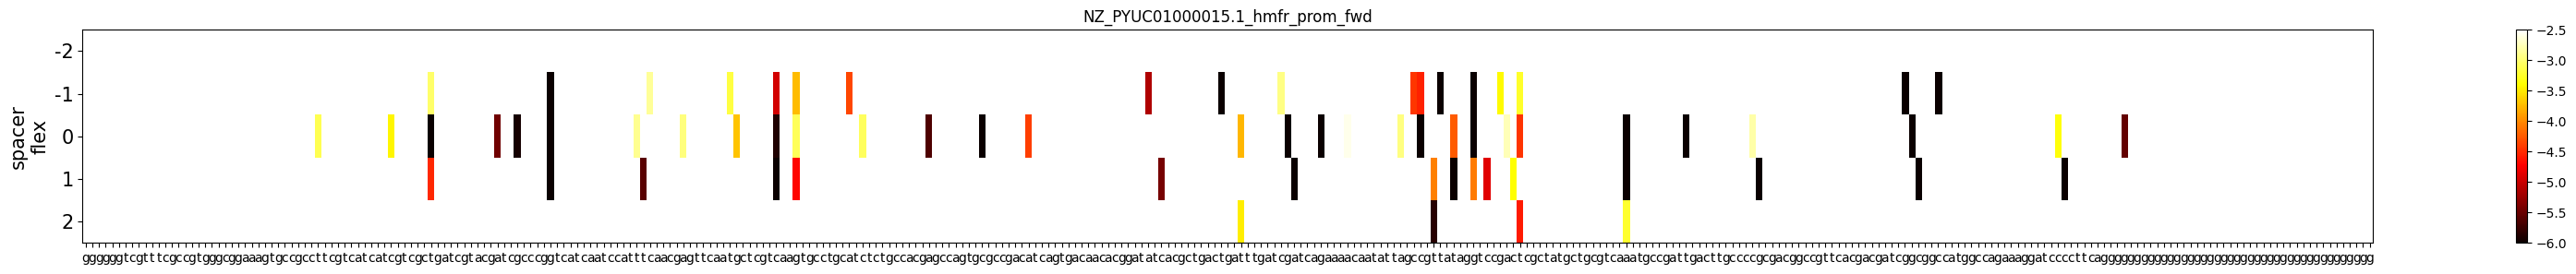

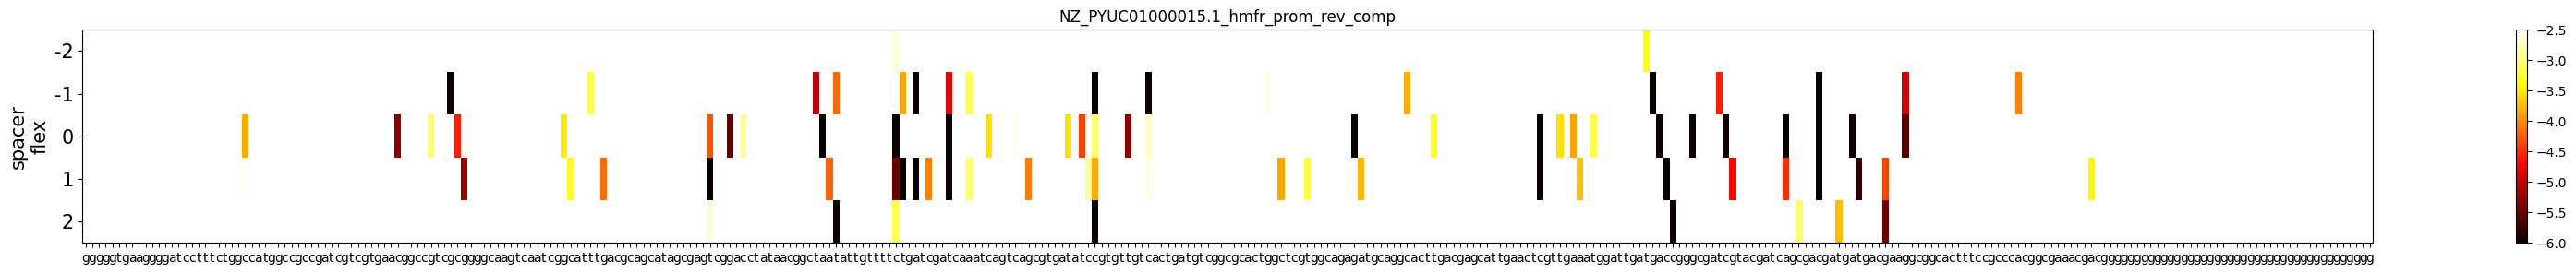

In [2]:
input_file = "../data/Input/hmf_prom_fwd_and_rev_21_10_24.fasta"
brickplotter.get_brickplot(input_file)

In [1]:
# Imports
from Bio.Seq import Seq
from __future__ import division, print_function, absolute_import
import os
import copy
from sys import path as syspath
import matplotlib.pyplot as plt
import pickle


In [3]:
# Model folder
curr_dir = os.path.join(os.getcwd() + "/../")
# Fasta file with sequences
input_fasta_filepath = os.path.join(os.getcwd(), '/../data/Input/v1.fasta')
# Output folder
output_folder = os.path.join(os.getcwd(), '/../data/Output')

os.chdir(curr_dir + '/notebooks/')
os.getcwd()
syspath.append(curr_dir + '/data/')
syspath.append(curr_dir + '/functions/')
syspath.append(curr_dir)
from utils.general_functions import *

In [12]:
bases = "acgt"
lett_to_index = dict(zip(bases, range(4)))
is_plus_one = True # True - a brick points to +1; False - points to -40
if is_plus_one: # shift for sequence to adjust +1 or -40
    shift = 40
else:
    shift = 0
    
is_reverse_complement = False # If True, reverse complement fasta seqs, then treat as usual

# For visualisation

max_value = -2.5
min_value = -6

is_high_to_default = False # If True, visualize brickplot values > treshold as default value
treshold = -2.5
default_value = max_value 
color_map = 'hot'

is_prefix_suffix = True # True - add Gs to the begining and end of each sequence to make it equal length and space for matrix

In [16]:
def preprocess_seq(input_fasta_filepath, is_reverse_complement, is_prefix_suffix, shift):
    fasta_reader = open(input_fasta_filepath, 'r')

    # Initial sequences: fasta -> dict
    dict_seqs = {}
    max_seq_len = 0
    for line in fasta_reader:
        if line.startswith('>'):
            seq_id = line.strip('>').strip()
            print(seq_id)
        else:
            seq = line.strip('"').strip()
            if seq == '':
                continue
            else:
                if is_reverse_complement:
                    seq = str(Seq(seq).reverse_complement())
            print('sequence length = '+str(len(seq)))
            if max_seq_len < len(seq):
                max_seq_len = len(seq)
            print(seq)
            dict_seqs[seq_id] = seq
            
    fasta_reader.close()

    # Sequences unified by length (TO MODIFY?)
    # Add artificial 'g's in the begining and the end of all sequences to mak ethem equal by length
    unified_seqs_dict = {}
    for seq_id in dict_seqs:
        seq = dict_seqs[seq_id]
        if is_prefix_suffix:
            prefix = str('g'*(max_seq_len - len(seq)+shift+5))
            suffix = str('g'*(32+2+shift))
            unified_seqs_dict[seq_id] = (prefix+seq+suffix).lower()
        else:
            unified_seqs_dict[seq_id] = seq.lower()
            
        #print(len(unified_seqs_dict[seq_id]))
            
    # Seqs as numbers: 1) list of Int arrays made from Sequences unified by length, 2) list of seq_ids     
    num_unified_seqs = []
    seq_ids = []
    for seq_id in unified_seqs_dict:
        seq_ids.append(seq_id)
    num_unified_seqs = np.array([np.array([lett_to_index[l] for l in s]) for s in unified_seqs_dict.values()])  
    return num_unified_seqs, seq_ids, unified_seqs_dict

In [13]:
# Import the model
dmp_path = curr_dir + "models/fitted_on_Pr.Pl.36N/model_[2]_stm+flex+cumul.dmp"
print(dmp_path)
with open(dmp_path,"rb") as f:
    model = pickle.load(f, encoding="latin1")
    
leftFoot, rightFoot = model["matrices"]
defaultSpacer       = model["Layout"][1]
spacerFlexibility   = model["spFlex"]
spacerPenalties     = model["sp.penalties"]

# the total footprint of RNAp
print('The total footprint of RNAp = '+str(sum(model["Layout"])))
matrix = np.vstack([
    leftFoot,
    np.ones((defaultSpacer,4))*np.nan,
    rightFoot
])

print('The matrix size = '+str(matrix.shape))

c:\Users\drago\Documents\GitHub\ThermotersV2\notebooks/../models/fitted_on_Pr.Pl.36N/model_[2]_stm+flex+cumul.dmp
The total footprint of RNAp = 32
The matrix size = (32, 4)


c:\Users\drago\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
from utils.model_functions import *
input_fasta_filepath = os.path.join(os.getcwd(), '../data/Input/v1_1.fasta')
num_unified_seqs, seq_ids, unified_seqs_dict = preprocess_seq(input_fasta_filepath, is_reverse_complement, is_prefix_suffix, shift)
bricks = getBricks(
    twoMatrices     = [leftFoot,rightFoot],
    minSpacer       = defaultSpacer-spacerFlexibility, # minimal spacer
    spacerPenalties = spacerPenalties,
    sequences       = num_unified_seqs
)

# Default spacer corresponds to spacer flex = 0 on a brickplot
print('defaultSpacer = '+str(defaultSpacer))


v1_1
sequence length = 290
ATGTCTAACTAGAATTAGACGACAGAGTGCCGCCCTTCACAAGTATCATAACAGCAGGCTCGCCTCTCTCTTCTCTCAGCATAAACCCTAGAACCGTAAATTTTATGCAAACCTAACGCCTGAGTTAAGCCGGCCCGCCCGATGCGGCTCCGGTCGGTCCGAGACCGCAAAGCGGGCTCGGCTTGAACGAATTGTTAGCTATCGATGATAAGCTGTCAAACATGAGCAGATCCTCTACGCCGGACGCATCGTGGCCGGCATCACCGGCGCCACAGGTGCGGTTGCTGGCG
defaultSpacer = 8


gggggatgtctaactagaattagacgacagagtgccgcccttcacaagtatcataacagcaggctcgcctctctcttctctcagcataaaccctagaaccgtaaattttatgcaaacctaacgcctgagttaagccggcccgcccgatgcggctccggtcggtccgagaccgcaaagcgggctcggcttgaacgaattgttagctatcgatgataagctgtcaaacatgagcagatcctctacgccggacgcatcgtggccggcatcaccggcgccacaggtgcggttgctggcgggggggggggggggggggggggggggggggggggggggggg

extended seg_len = 336


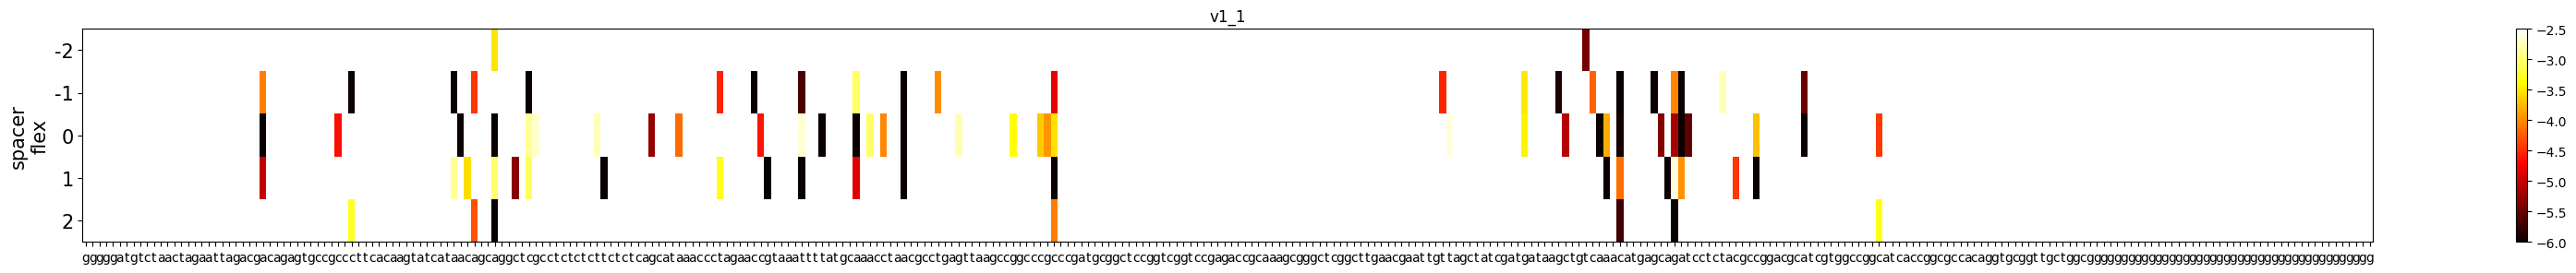

In [18]:
def remove_high_values(brick_in, treshold, default_value):
# Make values > treshold to be default value (for better visualization)
    brick_out = copy.deepcopy(brick_in)
    for i in range(brick_in.shape[0]):
        for j in range(brick_in.shape[1]):
            if brick_in[i,j] > treshold:
                brick_out[i,j] = default_value
    return brick_out
                
for i in range(len(num_unified_seqs)):
    curr_seq = unified_seqs_dict[seq_ids[i]][shift:-matrix.shape[0]-1]
    print(curr_seq)
    print('')
    print('extended seg_len = '+str(len(curr_seq)))
    theBrick = bricks.T[i]
    
    if is_high_to_default:
        theBrick_to_display = remove_high_values(theBrick, treshold, default_value)
    else:
        theBrick_to_display = theBrick

    output_folder = os.path.join(os.getcwd(), '../data/Output')
    
    plt.figure(figsize=(40,3))
    plt.imshow(theBrick_to_display.T[:,:theBrick_to_display.shape[0]-shift+1], cmap=color_map)
    plt.title(seq_ids[i])
    plt.yticks(range(5), np.arange(5)-2, fontsize=15)
    plt.xticks(range(len(curr_seq)), [char for char in curr_seq], fontsize=10)
    plt.clim([min_value,max_value])
    plt.ylabel('spacer\nflex', fontsize=15)
    plt.gca().set_aspect("auto")
    plt.colorbar()
    plt.savefig(output_folder + "/" + seq_ids[i] + '2.pdf') 
    